In [1]:
# basic imports
import random
import numpy as np
import os
import sys

# DL library imports
import torch
import segmentation_models_pytorch as smp
# import torch.nn as nn
# import torch.nn.functional as F

# libraries for loading image, plotting 
# import cv2
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
model_dir = '/home/j/j_sten07/palma_models'
# model_name = 'UNet_baseline_last.pt'
# model_name = 'segformer_30epochs_jaccardloss_0.0003lr_best.pt'
model1_name = 'unet_50epochs_jaccardloss_0.0003lr_8batches_last.pt'
model1_label = 'UNET'
model2_name = 'segformer_30epochs_jaccardloss_0.0003lr_best.pt'
model2_label = 'Segformer'
data_path = '/home/j/j_sten07/thesis_test/data/Potsdam/patches/500px'

In [3]:
# load dataset and create data loader
sys.path.append('..')
from utils import make_loader, load_datasets
train_dataset, val_dataset, test_dataset = load_datasets(data_path)
train_loader, val_loader, test_loader = make_loader(train_dataset, val_dataset, test_dataset)

In [4]:
from utils import IoU                  # metric class
from utils import evaluate_model

import sys
# from models import UNet, UNetEncoder, UNetDecoder

In [5]:
# load model
MODEL1_PATH = os.path.join(model_dir, model1_name)
checkpoint1 = torch.load(MODEL1_PATH)
model1 = checkpoint1['model']

MODEL2_PATH = os.path.join(model_dir, model2_name)
checkpoint2 = torch.load(MODEL2_PATH)
model2 = checkpoint2['model']

In [6]:
# Evaluation settings
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu") 
criterion = smp.losses.JaccardLoss('multiclass', log_loss = False, smooth=0.0)
NUM_CLASSES = 6

In [116]:
from matplotlib.dates import DateFormatter, date2num
myFmt = DateFormatter("%M:%S")

def plot_training_results(df, model_name):
    fig, ax1 = plt.subplots(figsize=(10,4))
    ax1.set_ylabel('trainLoss', color='tab:red')
    ax1.plot(df['epoch'].values, df['trainLoss'].values, color='tab:red')
    ax1.tick_params(axis='y', labelcolor='tab:red')

    ax2 = ax1.twinx()  
    ax2.set_ylabel('validationLoss', color='tab:blue')
    ax2.plot(df['epoch'].values, df['validationLoss'].values, color='tab:blue')
    ax2.tick_params(axis='y', labelcolor='tab:blue')
    
    ax3 = ax1.twinx()  
    ax3.set_ylabel('trainingTime(sec)', color='tab:orange', labelpad=-32)
    # ax3.yaxis.set_major_formatter(myFmt)
    ax3.tick_params(axis="y",direction="in", pad=-23)
    ax3.plot(df['epoch'].values, df['duration_train'].dt.total_seconds(), color='tab:orange')
    ax3.tick_params(axis='y', labelcolor='tab:orange')

    plt.suptitle(f'{model_name} Training, Validation Curves')
    plt.show()


In [118]:
pd.DataFrame(checkpoint1['results'])['duration_train']

0    0 days 00:05:58.744281
1    0 days 00:05:57.180069
2    0 days 00:05:57.176721
3    0 days 00:05:57.304962
4    0 days 00:05:57.354746
5    0 days 00:05:57.318846
6    0 days 00:05:57.333397
7    0 days 00:05:57.419068
8    0 days 00:05:57.472015
9    0 days 00:05:57.584389
10   0 days 00:05:57.313451
11   0 days 00:05:57.453416
12   0 days 00:05:57.411688
13   0 days 00:05:57.304911
14   0 days 00:05:57.177761
15   0 days 00:05:57.316821
16   0 days 00:05:57.411611
17   0 days 00:05:57.451722
18   0 days 00:05:57.423844
19   0 days 00:05:57.503247
20   0 days 00:05:57.571042
21   0 days 00:05:57.469079
22   0 days 00:05:57.474566
23   0 days 00:06:05.405283
24   0 days 00:06:02.830159
25   0 days 00:06:02.679905
26   0 days 00:06:02.895728
27   0 days 00:06:02.674002
28   0 days 00:06:02.453986
29   0 days 00:06:02.689316
30   0 days 00:06:02.847138
31   0 days 00:06:02.776822
32   0 days 00:06:02.780645
33   0 days 00:06:03.046469
34   0 days 00:06:02.714912
35   0 days 00:06:02

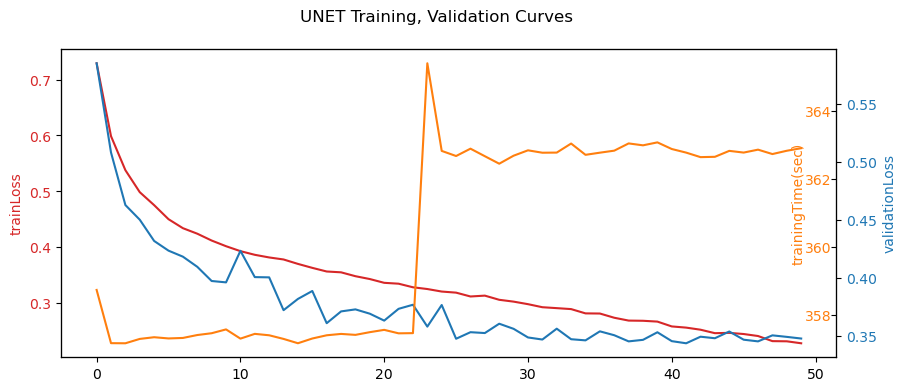

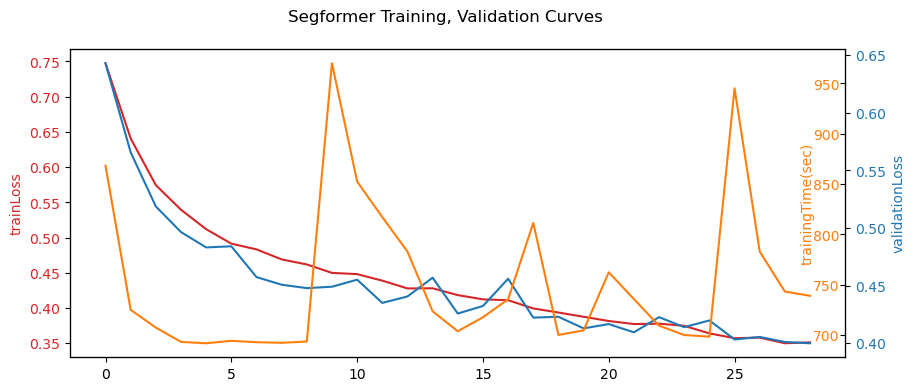

In [117]:
# from utils import plot_training_results

results_df1 = pd.DataFrame(checkpoint1['results'])
plot_training_results(results_df1, model1_label)

results_df2 = pd.DataFrame(checkpoint2['results'])
plot_training_results(results_df2, model2_label)

In [107]:
torch.cuda.empty_cache()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


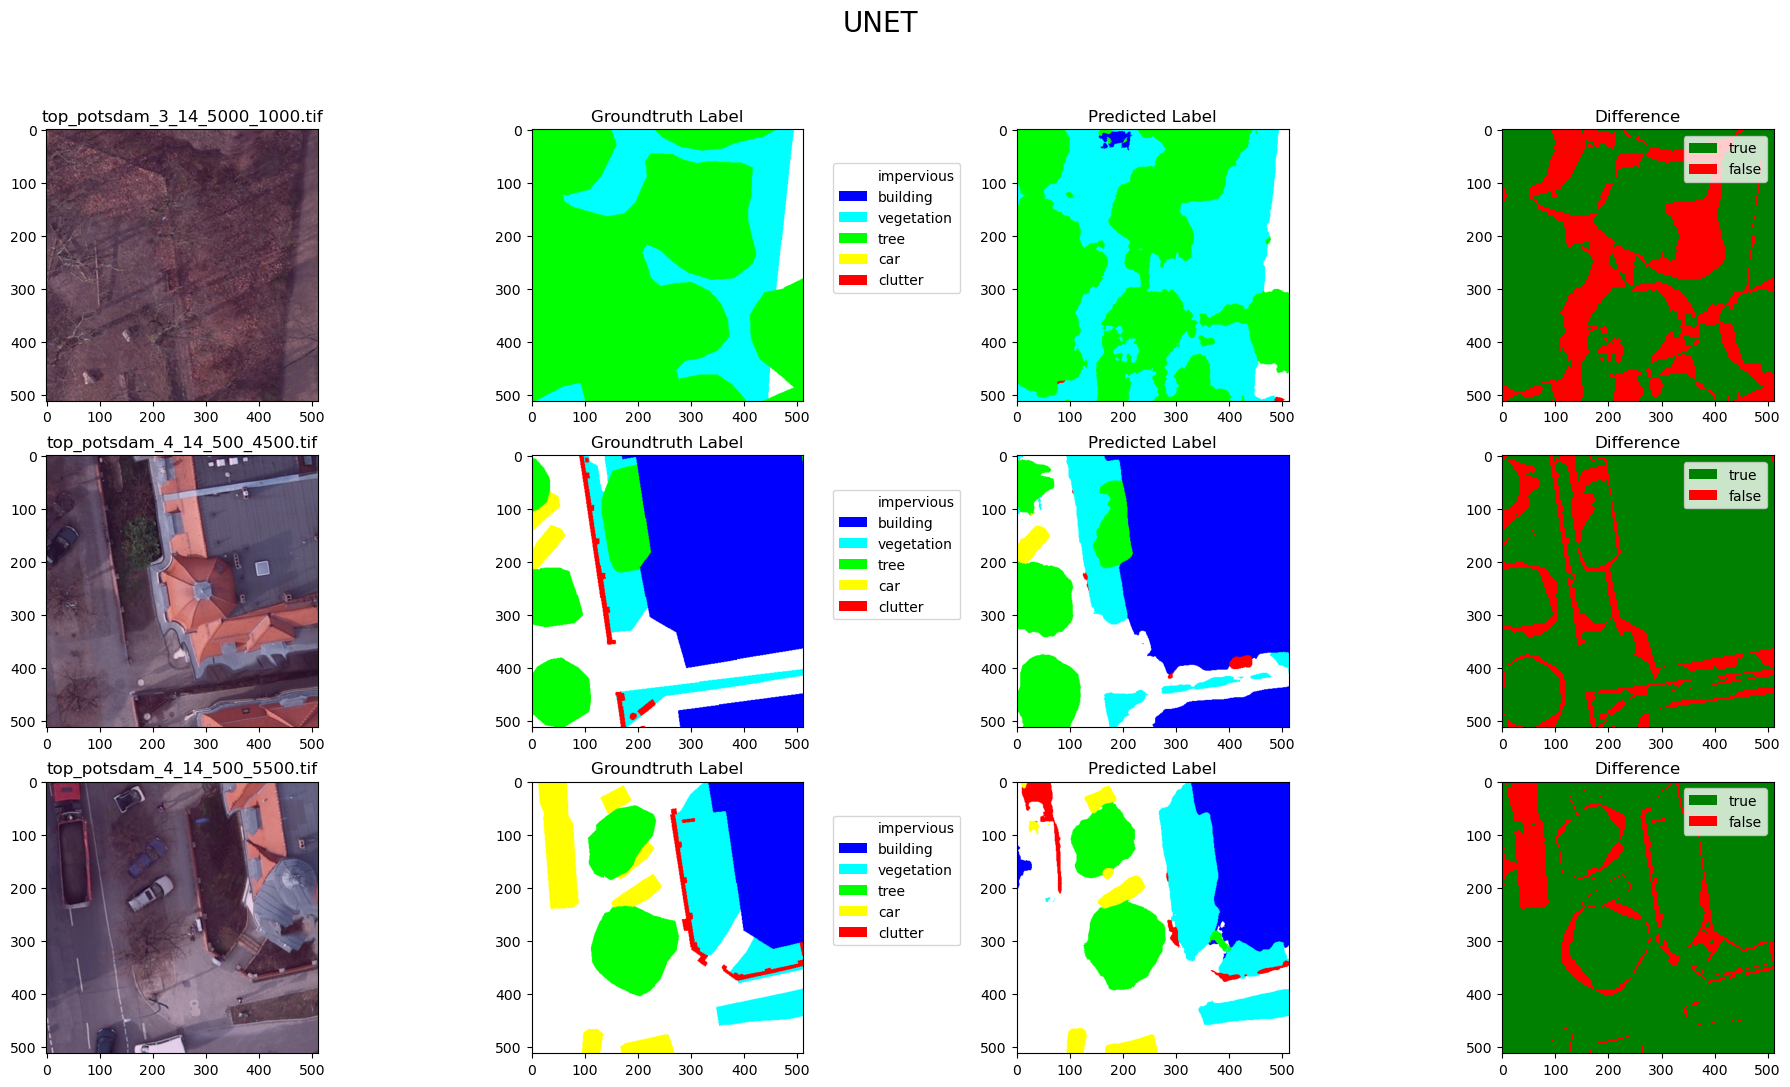

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


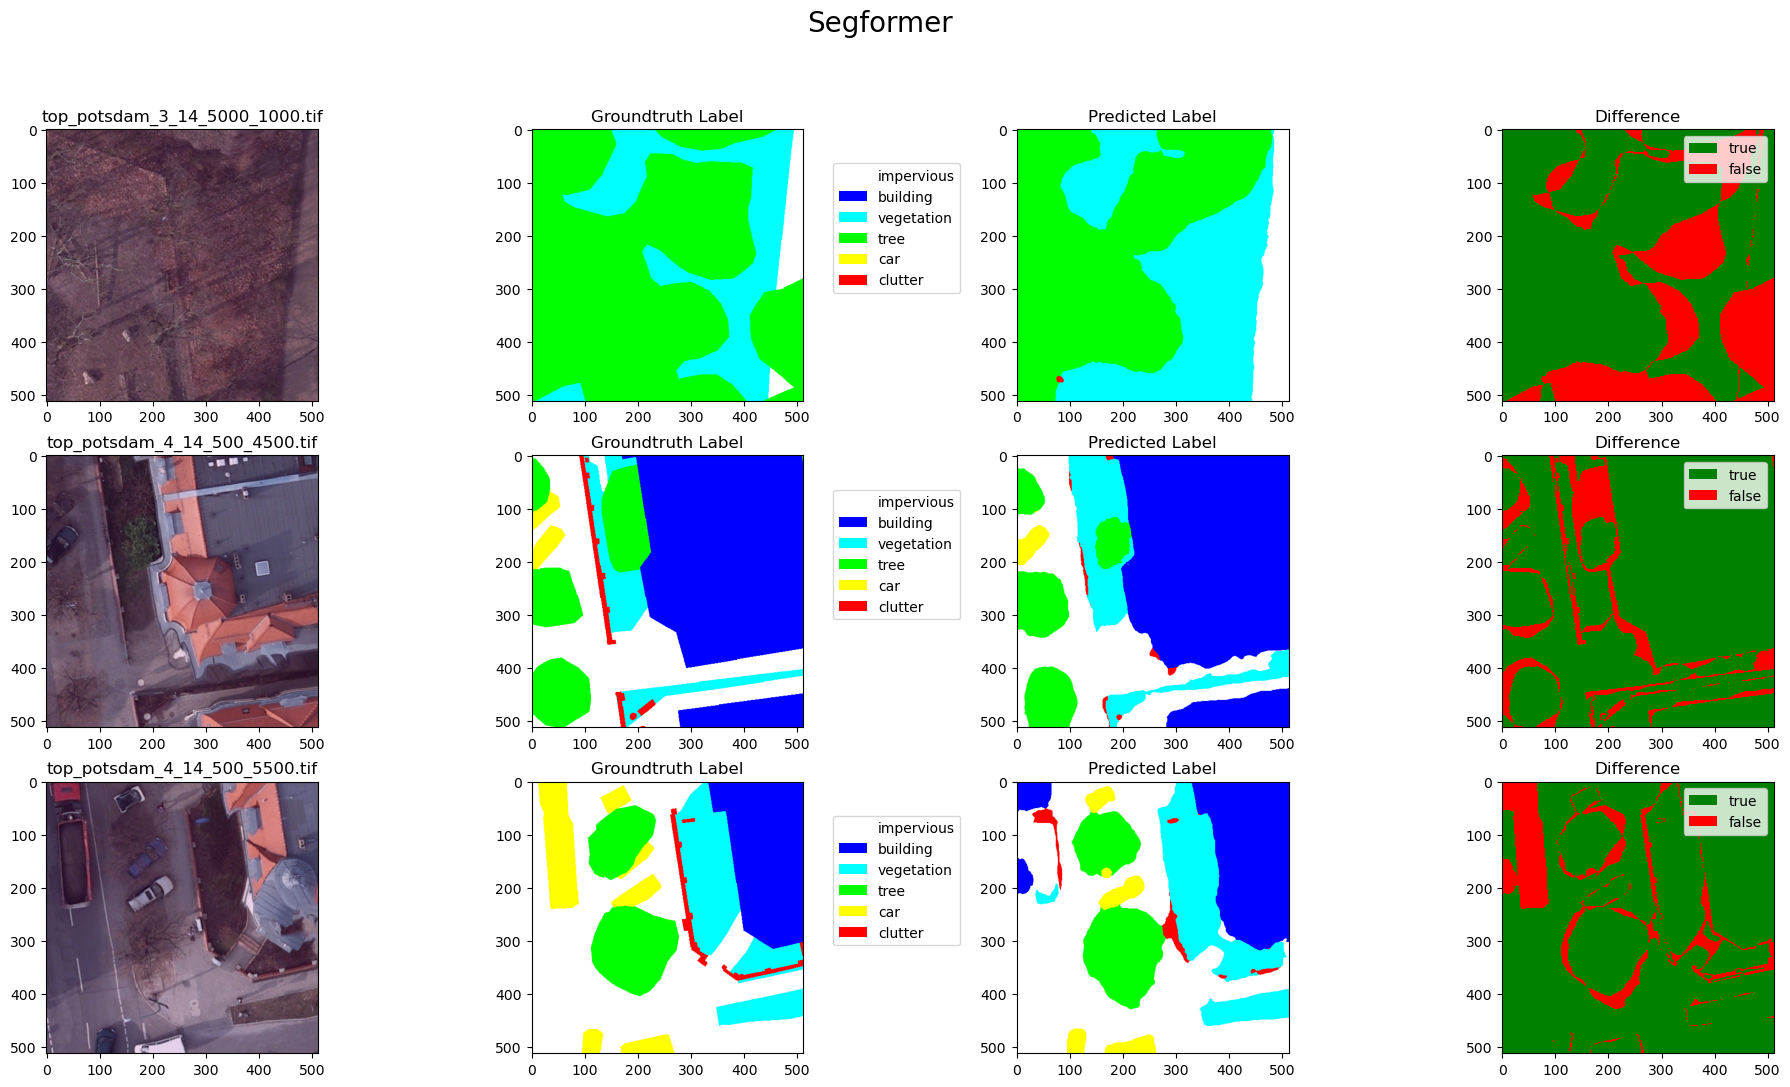

In [12]:
# plot test predictions
from utils import visualize_predictions, train_id_to_color, drivables

num_test_samples = 3
seed = 41
_, axes1 = plt.subplots(num_test_samples, 4, figsize=(4*6, num_test_samples * 4))
_.suptitle(model1_label, fontsize=20)
visualize_predictions(model1, test_dataset, axes1, device, numTestSamples=num_test_samples, id_to_color=train_id_to_color, seed = seed)
_, axes2 = plt.subplots(num_test_samples, 4, figsize=(4*6, num_test_samples * 4))
_.suptitle(model2_label, fontsize=20)
visualize_predictions(model2, test_dataset, axes2, device, numTestSamples=num_test_samples, id_to_color=train_id_to_color, seed = seed)

In [13]:
# evaluate model performance on test dataset
_, test_metric1 = evaluate_model(model1, test_loader, criterion, IoU, NUM_CLASSES, device)
# print(f"\nModel has {test_metric1} metrices in test set")
_, test_metric2 = evaluate_model(model2, test_loader, criterion, IoU, NUM_CLASSES, device)
# print(f"\nModel has {test_metric1} metrices in test set")

100%|██████████| 360/360 [01:48<00:00,  3.31it/s]



Model has {'accuracy': 0.8375789748297797, 'miou': 0.6656498321984937, 'classwise_iou': array([0.75494862, 0.85239391, 0.69245959, 0.69539243, 0.81237534,
       0.1863291 ]), 'classwise_f1': array([0.8603655 , 0.92031603, 0.81828789, 0.82033211, 0.89647583,
       0.31412717]), 'f1_mean': 0.7716507551928697, 'matrix': array([[4.2409362e+07, 1.8608880e+06, 2.6151690e+06, 9.1447700e+05,
        1.7014700e+05, 4.2942700e+05],
       [1.0507310e+06, 3.7816471e+07, 3.3781600e+05, 1.5011700e+05,
        6.4740000e+03, 8.3584000e+04],
       [2.1753780e+06, 7.8741700e+05, 4.1488224e+07, 3.2211950e+06,
        7.0490000e+03, 5.2019600e+05],
       [1.5066900e+06, 3.3185400e+05, 6.9840960e+06, 3.1429139e+07,
        9.6907000e+04, 1.5641300e+05],
       [1.9670300e+05, 7.0770000e+04, 1.7765000e+04, 6.4049000e+04,
        3.0918900e+06, 3.6854000e+04],
       [2.8461910e+06, 1.8688960e+06, 1.7599840e+06, 3.4132600e+05,
        4.7379000e+04, 1.8526520e+06]])} metrices in test set


100%|██████████| 360/360 [01:43<00:00,  3.47it/s]


Model has {'accuracy': 0.8375789748297797, 'miou': 0.6656498321984937, 'classwise_iou': array([0.75494862, 0.85239391, 0.69245959, 0.69539243, 0.81237534,
       0.1863291 ]), 'classwise_f1': array([0.8603655 , 0.92031603, 0.81828789, 0.82033211, 0.89647583,
       0.31412717]), 'f1_mean': 0.7716507551928697, 'matrix': array([[4.2409362e+07, 1.8608880e+06, 2.6151690e+06, 9.1447700e+05,
        1.7014700e+05, 4.2942700e+05],
       [1.0507310e+06, 3.7816471e+07, 3.3781600e+05, 1.5011700e+05,
        6.4740000e+03, 8.3584000e+04],
       [2.1753780e+06, 7.8741700e+05, 4.1488224e+07, 3.2211950e+06,
        7.0490000e+03, 5.2019600e+05],
       [1.5066900e+06, 3.3185400e+05, 6.9840960e+06, 3.1429139e+07,
        9.6907000e+04, 1.5641300e+05],
       [1.9670300e+05, 7.0770000e+04, 1.7765000e+04, 6.4049000e+04,
        3.0918900e+06, 3.6854000e+04],
       [2.8461910e+06, 1.8688960e+06, 1.7599840e+06, 3.4132600e+05,
        4.7379000e+04, 1.8526520e+06]])} metrices in test set


In [ ]:
# 1. Run model on test dataset
# 2. Visualize matrix

In [31]:
def create_resultstable(metrices):
    # get matrix from results
    # results = results_df.metrices[len(results_df)-1] 
    results = metrices
    matrix = results['matrix']
    # calculate recall and respective values for wrong segmentations
    matrix_per = matrix / matrix.sum(axis = 1)[np.newaxis].T # transpose sum to apply divison to rows
    recall = np.diag(matrix_per)
    # other metrices
    precision = np.diag(matrix / matrix.sum(axis = 0))
    f1 = 2*precision*recall / (precision+recall)
    
    # classes as captions for table
    CLASSES = ['impervious', 'building', 'vegetation', 'tree', 'car', 'clutter']
    
    # make df and add column names and ids
    df = pd.DataFrame(matrix_per)
    df.columns = [s + '_pred' for s in CLASSES]
    df.index = [s + '_tr' for s in CLASSES]
    # add metrices
    df.loc['Precision'] = precision
    df.loc['Recall'] = recall
    df.loc['f1'] = f1
    df.loc['IoU'] = results['classwise_iou']
    
    # print('Metrices')
    print(f'Accuracy: {results["accuracy"]}, MeanIoU: {results["miou"]}, f1 score mean: {results["f1_mean"]}')
    print('"row predicted as column"')
    display(df)

In [32]:
print(f'{model1_label} ({len(results_df1)} epochs)')
create_resultstable(test_metric1)
print(f'{model2_label} ({len(results_df2)} epochs)')
create_resultstable(test_metric2)

UNET (50 epochs)
Accuracy: 0.8375789748297797, MeanIoU: 0.6656498321984937, f1 score mean: 0.7716507551928697
"row predicted as column"


,impervious_pred,building_pred,vegetation_pred,tree_pred,car_pred,clutter_pred
impervious_tr,0.876236,0.038449,0.054033,0.018894,0.003515,0.008873
building_tr,0.026638,0.958709,0.008564,0.003806,0.000164,0.002119
vegetation_tr,0.045133,0.016337,0.860761,0.066831,0.000146,0.010793
tree_tr,0.037198,0.008193,0.172425,0.775930,0.002392,0.003862
car_tr,0.056556,0.020348,0.005108,0.018415,0.888977,0.010596
clutter_tr,0.326532,0.214411,0.201916,0.039159,0.005436,0.212547
Precision,0.845060,0.884879,0.779809,0.870124,0.904102,0.601681
Recall,0.876236,0.958709,0.860761,0.775930,0.888977,0.212547
f1,0.860365,0.920316,0.818288,0.820332,0.896476,0.314127
IoU,0.754949,0.852394,0.692460,0.695392,0.812375,0.186329


Segformer (29 epochs)
Accuracy: 0.8021400822533502, MeanIoU: 0.6243050470642394, f1 score mean: 0.7434807045208468
"row predicted as column"


,impervious_pred,building_pred,vegetation_pred,tree_pred,car_pred,clutter_pred
impervious_tr,0.892687,0.027704,0.042295,0.024028,0.004335,0.008951
building_tr,0.054472,0.908501,0.010241,0.004946,0.000767,0.021072
vegetation_tr,0.073060,0.013513,0.770110,0.121205,0.000347,0.021765
tree_tr,0.061797,0.007949,0.174003,0.741795,0.004205,0.010251
car_tr,0.072666,0.013601,0.006166,0.014464,0.872314,0.020789
clutter_tr,0.395786,0.139995,0.124045,0.081144,0.011454,0.247576
Precision,0.784396,0.909134,0.777838,0.790611,0.852007,0.435167
Recall,0.892687,0.908501,0.770110,0.741795,0.872314,0.247576
f1,0.835045,0.908817,0.773955,0.765425,0.862041,0.315600
IoU,0.716805,0.832874,0.631262,0.619991,0.757532,0.187367
